# Online Shoppers Purchasing Intention Prediction Model

## Authored by :

**Team_TechTitans**\
Satya Srirama Siva Krishna Sanam - U19448106\
Sri Sai Tharun Kesavadas - U07427133\
Nellutla Sai Nikhil - U39387302\
Ruthvik Bacha - U12145480\
Dalavai Gagannath - U45739433

## Problem Statement

Online Shopping is a huge and growing form of purchasing which caters to huge portion of business revenue in the e-commerce sector. The client is facing the problem of low rate of sales conversion and seeks to increase revenue from its online shopping platform by converting visitors into customers on the basis of the customer’s online activities.Given clickstream and session data of a user who visits an e-commerce website, can we predict whether or not that visitor will make a purchase?

Answering this question is critical for these types of companies in order to ensure that they are able to remain profitable. This information can be used to nudge a potential customer in real-time to complete an online purchase, increasing overall purchase conversion rates.

The dataset consists of 18 features belonging to 12330 sessions of unique users.The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

## Preliminary Business Problem Scope

Our project is focused on applying Machine Learning classification models to e-commerce website data.The Objective of this project is to build a 'Predictive Machine Learning Model' that can predict customer purchase intention as accurately as possible.This project aims to use the information of customers by tracing their web acitivity when they visit an online shopping site.We intend to develop different machine learning models and evaluate them and identify best model in predicting purchasing intention of a customer.

## Choosing Best Evaluation Metric for the Model 

#### Our model predicts whether a shopper intends to make a purchase or not .

True Positives (TP): These are instances where the model correctly predicts that a shopper intends to make a purchase. These are our successful predictions. 

True Negatives (TN): These are cases where the model correctly predicts that a shopper does not intend to make a purchase. These represent accurate negative predictions.

False Positives (FP): In these instances, the model wrongly predicts that a shopper intends to make a purchase when they do not. These are also known as Type I errors or 'false alarms.'

False Negatives (FN): Here, the model incorrectly predicts that a shopper does not intend to make a purchase when they actually do. These are Type II errors or 'missed opportunities.'

###  We have chosen f1 as best evaluation metric for our model.

Initially we have thought of using **recall** as our performance metric as it is ability to identify all relevant instances of the positive class. In the context of online shopper purchase intention, recall can be explained as follows:

**True Positives(TP)**: As mentioned earlier, these are cases where the model correctly predicts potential customers who intend to make a purchase.

**False Negatives(FN)**: These are instances where the model incorrectly predicts that a shopper does not intend to make a purchase when they actually do.

For an online retailer, high recall ensures that as many potential customers as possible are correctly identified, increasing the chances of conversion and revenue.

**Cost of having more False Negatives** :

In this case having more false negatives could lead to lost sales and revenue.The user may not receive relevant product recommendations or incentives, potentially causing them to abandon their shopping session.So we also need to better Recall for the model.

So having high recall indicates lower rate of false negatives.

------------------------------------------------------------------------------------------------------

On the other hand we felt **precision** is also important as it is ability of the model to make accurate positive predictions, out of all the positive predictions it makes.

Precision measures the accuracy of positive predictions made by the model. In the context of online shopper purchase intention, precision can be explained as follows:

**True Positives(TP)**: These are cases where the model correctly predicts that a shopper intends to make a purchase. For an online retailer, this means correctly identifying potential customers who are likely to complete a purchase.

**False Positives(FP)**: These are instances where the model wrongly predicts that a shopper intends to make a purchase when they do not. 

For an online retailer, high precision means accurately identifying and targeting potential customers to increase the chances of conversion while avoiding unnecessary promotional efforts on customers who are unlikely to make a purchase.

**Cost of having more False Postives** :

This can result in annoying or spamming customers, which may lead to dissatisfaction and even loss of potential sales if the user decides to disengage from the platform. It can also incur additional marketing costs and resource wastage.So we need to better Precision for the model.

A higher precision indicates a lower rate of false positives.

#### Reasons for choosing F1 as main evaluation metric

We felt in this case both precision and recall might be of equal importance.

Therefore we have decided to stike a balance between recall and precision. We wanted a single measure that considers both the false positives and false negatives in a classification model.That is the reason why we chose 'F1-score' as our perofrmance metric.

The F1 score provides a single number that tells you how well your model is at both finding all the relevant items (high recall) and ensuring those it identified are indeed relevant (high precision). It's a way to balance the trade-off between making sure you catch as many relevant things as possible while avoiding false alarms.

## Step 1: Importing Required libraries

In this section we will import the required libraries for the notebook to perform our predictive analysis of the model.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score,auc

random_seed=42
import warnings
warnings.filterwarnings("ignore")


## Step 2:  Data Preprocessing

After importing required libraries the next is data preprocessing. \
The following are various steps in data preprocessing stage. 

1.Load the data set(csv file) into our notebook using pandas library.\
2.We will be checking the various attributes of the dataframe such as dimensions,column names.\
3.Renaming columns if necessary, for a clean analysis and better understanding.\
4.Dropping unnecessary features as they don't contribute in predicting the target variable.\
5.Check for the datatypes of all columns in dataset and if the datatype of categorical variables is   not 'category', change them into 'category' type for faster computations and improved performance. \
6.Check for any missing values(null) in the dataset and drop the rows with missing values in the target variable.\
7.Check for the unique values in the categorical features to have an idea about data imbalancing and address any misspelled words in column values.\
8.Converting categorical data into numerical data using dummy/one hot encoding

### Loading the Data

In [2]:
#Loading the data from the local machine
df=pd.read_csv('C:/Users/dalav/Downloads/online_shoppers_intention_ds.csv')
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


###  Exploring Rows and columns

Checking the dimensions of the dataset.

In [3]:
df.shape

(12330, 18)

From the above result,dataset has 12330 observations(rows) with 18 features(columns).

###  Renaming columns

Checking for column names and rename them if necessary for better understanding.

In [4]:
df.columns #to get the idea about column names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

We can see that all columns are properly named. So there is no need of renaming the column names.

If there is any spaces in the column names, we would replace the space with underscore. 

In [5]:
# Exploring the dataset
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Dropping unnecessary columns

After carefully examining the dataset, we found that every column is useful in predicting the target variable.There are no unnecessary columns in our dataset. Therefore no columns are dropped from dataset.

### Check for datatype of categorical variables

In this section we check for datatype of columns(especially the categorical variables) and if datatype of categorical variable is 'object' we change it to 'category' for faster computations and improved performace of our model.

In [6]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

VisitorType and Month are categorical columns with datatype as object. So we change their datatype to category

In [7]:
print(df.VisitorType.dtype) # double checking and confirming that the column is an 'object' type
df.VisitorType = df.VisitorType.astype('category') # changing the column type to a categorical variable
print(df.VisitorType.cat.categories)  # Printing the categories found
print(df.VisitorType.dtype)  # confirming that the column type has been changed to categorical

object
Index(['New_Visitor', 'Other', 'Returning_Visitor'], dtype='object')
category


In [8]:
print(df.Month.dtype) # double checking and confirming that the column is an 'object' type
df.Month = df.Month.astype('category') # changing the column type to a categorical variable
print(df.Month.cat.categories)  # Printing the categories found
print(df.Month.dtype)  # confirming that the column type has been changed to categorical

object
Index(['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'], dtype='object')
category


###  Checking for missing values

Checking for any missing values to know the integrity of the data.

In [9]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

From the above results we can say that there are no missing values in the dataset. We can say the quality of our dataset is good.

If there are any missing(null) values the following are the steps to be followed.\
1.Check if null values are present in target variable and drop corresponding observations if present.

(df = df.dropna(subset=['Revenue'])

2.Drop the observations if the number of missing values in a row/column is greater than assumed threshold value.

(df = df.dropna(axis=1, thresh=int(0.60*df.shape[0])) #axis=1 -column and axis=0 -row. 0.6 is the threshold value which means column/row is dropped if it has less than 60% non null values .)

### Checking unique values and misspelled words

In this section we check for unique values for some of columns using unique() method and see if there are any misspell words in columns./

In [10]:
df.VisitorType.unique()

['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['New_Visitor', 'Other', 'Returning_Visitor']

In [11]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [12]:
df.Weekend.unique()

array([False,  True])

In [13]:
df.Weekend.value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [14]:
df.Month.unique()

['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Categories (10, object): ['Aug', 'Dec', 'Feb', 'Jul', ..., 'May', 'Nov', 'Oct', 'Sep']

In [15]:
df.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [16]:
df.Revenue.unique()

array([False,  True])

In [17]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

### Dummy Encoding the categorical variable

In this section we convert categorical data to numerical data using dummy encoding. By encoding, all the categorical data is converted to 0s and 1s so that the model can understand them.

In [19]:
df = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=['Weekend'], 
    dtype='int32'
)


In [20]:
df = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=False, 
    columns=['Month'], 
    dtype='int32'
)


In [21]:
df = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=['VisitorType'], 
    dtype='int32'
)


In [18]:
df = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=['Revenue'], 
    dtype='int32'
)


In [22]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [136]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue_True',
       'Weekend_True', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [23]:
df.shape

(12330, 28)

We can observe that number of columns increased to 28 as we have encoded that categorical columns.

### Identifying input and target variables

In this section we identify all our input features and target varibales so that it can be helpful for train test split

In [24]:
input_features=df.drop(columns=['Revenue_True'])
target=df['Revenue_True']

'input_features' contains all independent variables which has all columns except 'Revenue_True' and 'target' is our target variable

### Splitting the Data

In this section we will be splitting the data into train and test data to train and validate our model respectively.Here the test size is 0.3 (30%) of the data and train size is 0.7 (70%).

Since the Dataset is sufficiently large we will chose train size as 0.7(70%) of the data to train the model.

Always training data is given more weightage because this is where the model learns patterns, relationships, and dependencies in the data. The model "fits" to the training data, adjusting its parameters (weights) to minimize the difference between its predictions and the actual target values. The training data is of utmost importance because it directly influences the model's performance.so that the model can be trained well and predictions can be made accurately.

Usually train data is given more weight so that model can be trained sufficiently.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.3, random_state=42)

Checking the split data shapes

In [26]:
print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)
print('X test shape:', X_test.shape)
print('Y train shape:', y_test.shape)

X train shape: (8631, 27)
y train shape: (8631,)
X test shape: (3699, 27)
Y train shape: (3699,)


## Imputing the missing values

After train-test-split, next step is imputing missing values.

For numeric columns, we calculate the mean value and using the mean value we fill the missing values of those columns. 

For the dummy variable columns, we use the mode value  to impute the missing values. 

Since we don't have any missing values in the dataset there is no need for any imputation.

## Scaling the data

After imputing, next step is scaling of data so that data across the dataset stands on a uniform scale for accurate analysis.

Scaling is performed using standardscaler function.

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)


### Checking for Data Imbalance and Adressing it

Before fitting the model we need to check if there is any data imbalance in the dataset and if there is any we address it using techniques like under sampling, over sampling , SMOTE etc.

In [28]:
df.Revenue_True.value_counts()

0    10422
1     1908
Name: Revenue_True, dtype: int64

Revenue_True is our target variable which has 2 classes 0 and 1.

There are 10422 observations with class 0 and 1908 observations with class 1.\
Class 0 means no revenue generated - majority class\
Class 1 means revenue generated    - minority class

So there is clearly data imbalance between classes in the target variable.

**To address the data imbalance we decided to use SMOTE sampling technique. The reason why we chose SMOTE is**

1.SMOTE often leads to better model performance compared to simple oversampling or undersampling. It helps the model learn the underlying patterns more effectively.

2.SMOTE creates a balanced dataset, allowing the model to learn from both classes more evenly. This can lead to better classification results and prevent the model from being biased toward the majority class.

3.SMOTE doesn't discard any data, unlike undersampling, which removes data points from the majority class. This means you can use all your available data for training

### SMOTE Sampling Technique

In [29]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

## Step 3: MODEL FITTING

In this section we fit our dataset using various supervised machine learning algorithms and evaluate their performance using various evaluation metrics. Some of the models we use are

1.Logistic Regression \
2.KNN\
3.Decision Trees\
4.Support Vector Classifier\
5.Random Forest\
6.ADA Boost\
7.Gradient Boost\
8.XGBoost\
9.Neural Networks

We will fit our model and evaluate the model performance in 2 ways.\
1.Without hyper parameter tuning\
2.With hyper parameter tuning

### Hyper Parameter Tuning 

We will also explore the process of hyperparameter tuning for our model. Hyperparameter tuning is essential for optimizing the performance of the model. We will focus on finding the best combination of hyperparameters to achieve better performance of model.

#### Tuning Process

The hyperparameter tuning process generally involves the following steps:

1.Define the hyperparameters and their ranges to be tuned.\
2.Select the search method (Grid Search or Random Search).\
3.Perform cross-validation to evaluate each combination of hyperparameters.\
4.Identify the best combination that optimizes model performance.


#### Grid Search or Random Search

There are two common methods for hyperparameter tuning: Grid Search and Random Search.

**Grid Search**: Grid Search exhaustively searches all possible combinations of hyperparameters within predefined ranges. It's a systematic but computationally expensive approach.

**Random Search**: Random Search randomly samples combinations of hyperparameters within predefined ranges. It's more efficient for large search spaces.

We apply both search methods to our dataset.

#### Cross-Validation

To assess the performance of different hyperparameter combinations, we will use cross-validation. Cross-validation helps us estimate how the model might perform on unseen data by splitting the training data into multiple subsets for training and validation.

## Logistic Regression

In this section, we will explore the development of a Logistic Regression model. Logistic Regression is a widely-used algorithm for binary and multi-class classification tasks.

We have chosen to work with the Logistic Regression algorithm due to its simplicity, interpretability, and effectiveness in classification problems. Logistic Regression is particularly valuable when we need to understand the probability of an event occurring.

In [61]:
logistic_model = LogisticRegression()

logistic_model.fit(X_smote, y_smote)
logistic_predictions = logistic_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)

In [95]:
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Precision:", logistic_precision)
print("Logistic Regression recall:", logistic_recall)
print("Logistic Regression f1:", logistic_f1)
print(f"{'Logistic Regression Confusion matrix:'}{confusion_matrix(y_test, logistic_predictions)}")
print(f"{'Logistic Regression Classification report:':}{classification_report(y_test, logistic_predictions)}")


Logistic Regression Accuracy: 0.8532035685320357
Logistic Regression Precision: 0.519277108433735
Logistic Regression recall: 0.7495652173913043
Logistic Regression f1: 0.613523131672598
Logistic Regression Confusion matrix:[[2725  399]
 [ 144  431]]
Logistic Regression Classification report:              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3124
           1       0.52      0.75      0.61       575

    accuracy                           0.85      3699
   macro avg       0.73      0.81      0.76      3699
weighted avg       0.88      0.85      0.86      3699



For the logistic model we got weighed average F1 score value as 0.86.We are taking the weighed average value as it takes data imbalance into the account for calculation.

#### Random Search - Logistic Regression


Logistic Regression has various hyperparameters that can be adjusted to improve model performance. Some of the key hyperparameters we will tune include:

"C (Inverse of Regularization Strength), Penalty, Solver"

In [137]:
param_grid_random_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
} #defining different parameters

# Creating a Randomized Search model
random_search = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_grid_random_logistic,
    n_iter=50,  # Number of random combinations 
    scoring='f1',  # Evaluation metric
    cv=10,  # Cross-validation folds
    n_jobs=-1,  # Utilizing all available CPUs
    random_state=42  # For reproducibility
)

In [97]:
random_search.fit(X_smote, y_smote) #fitting the model for random search

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='f1')

In [98]:
y_pred_random_logistic= random_search.predict(X_test) #predicting the values

In [99]:
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_random_logistic)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_random_logistic)}")
print(f"{'Recall Score: ':18}{recall_score(y_test, y_pred_random_logistic)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_random_logistic)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_random_logistic)}")
print("Random Search Best Parameters:", random_search.best_params_)

Accuracy Score:   0.8599621519329549
Precision Score:  0.5350553505535055
Recall Score:     0.7565217391304347
F1 Score:         0.626801152737752
Classification report:               precision    recall  f1-score   support

           0       0.95      0.88      0.91      3124
           1       0.54      0.76      0.63       575

    accuracy                           0.86      3699
   macro avg       0.74      0.82      0.77      3699
weighted avg       0.89      0.86      0.87      3699

Random Search Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}


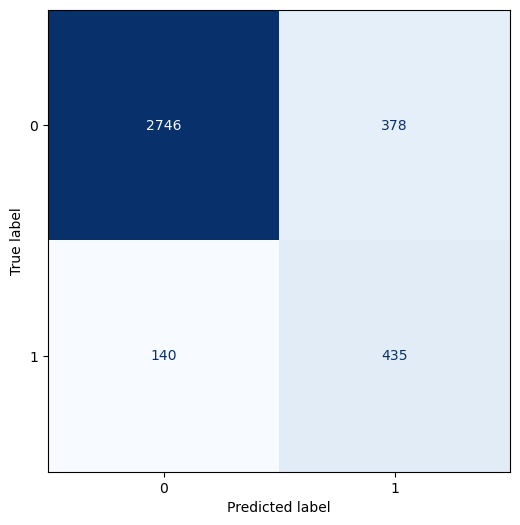

In [100]:
cm = confusion_matrix(y_test, y_pred_random_logistic)

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_random_logistic, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

#### Grid Search - Logistic Regression

In [101]:
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid_random_logistic,
    scoring='f1',  # Evaluation metric
    cv=10,  # Cross-validation folds
    n_jobs=-1,  # Utilizing all available CPUs
)

In [102]:
grid_search.fit(X_smote, y_smote) #fitting the model for grid search

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [103]:
y_pred_grid_logistic = grid_search.predict(X_test) #predicitng the values

In [104]:
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_grid_logistic)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_grid_logistic)}")
print(f"{'Recall Score: ':18}{recall_score(y_test, y_pred_grid_logistic)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_grid_logistic)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_grid_logistic)}")
print("Grid Search Best Parameters:", grid_search.best_params_)

Accuracy Score:   0.8834820221681535
Precision Score:  0.5989010989010989
Recall Score:     0.7582608695652174
F1 Score:         0.6692248656945511
Classification report:               precision    recall  f1-score   support

           0       0.95      0.91      0.93      3124
           1       0.60      0.76      0.67       575

    accuracy                           0.88      3699
   macro avg       0.78      0.83      0.80      3699
weighted avg       0.90      0.88      0.89      3699

Grid Search Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


The weighed averge F1 score for this model is 0.89 we couldn't observe any change in the values even after hyperparameter tuning.

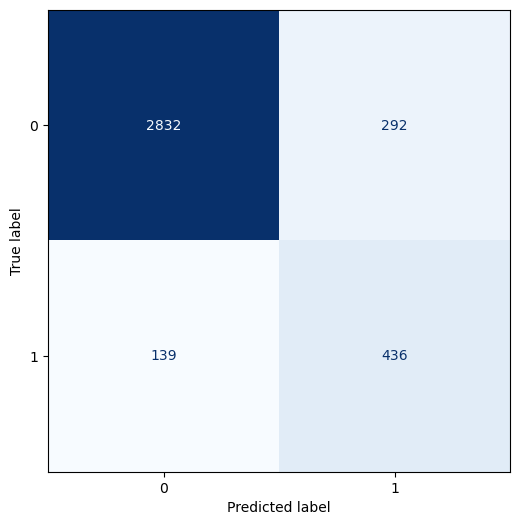

In [105]:
cm = confusion_matrix(y_test, y_pred_grid_logistic)

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_grid_logistic, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

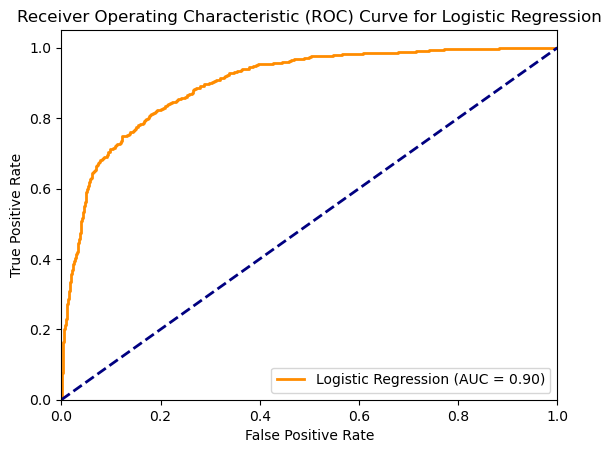

In [138]:
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Area under the curve for this model is 0.9

## KNN Model

Selecting the K value by the rule of thumb,K= Squareroot of number of observarions, Here in this dataset we have 12330 observations.So K value is 111.

In [107]:
knn_model = KNeighborsClassifier(n_neighbors=111) 

knn_model.fit(X_smote, y_smote)
knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

In [108]:
print("KNN Precision:", knn_precision)
print("KNN Accuracy:", knn_accuracy)
print("KNN f1:", knn_f1)
print("KNN recall:", knn_recall)
print("KNN Classification Report:\n", knn_report)

KNN Precision: 0.34236267870579384
KNN Accuracy: 0.7312787239794539
KNN f1: 0.4779411764705883
KNN recall: 0.7913043478260869
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      3124
           1       0.34      0.79      0.48       575

    accuracy                           0.73      3699
   macro avg       0.65      0.76      0.65      3699
weighted avg       0.86      0.73      0.77      3699



The weighed Average F1 Score for this model is 0.77.

## Decision Tree

In this section, we will explore the development of a Decision Tree model. Decision Trees are a popular and interpretable machine learning algorithm used for both classification and regression tasks.

We have chosen to work with the Decision Tree algorithm due to its simplicity and interpretability. Decision Trees provide insights into the decision-making process and are suitable for tasks where understanding the logic behind predictions is essential.

In [109]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_smote, y_smote) #fitting the model
decision_tree_predictions = decision_tree_model.predict(X_test) #predicting the model

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions)
decision_tree_recall = recall_score(y_test, decision_tree_predictions)
decision_tree_f1 = f1_score(y_test, decision_tree_predictions)
decision_tree_report = classification_report(y_test, decision_tree_predictions)

In [110]:
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Precision:", decision_tree_precision)
print("Decision Tree recall:", decision_tree_recall)
print("Decision Tree f1:", decision_tree_f1)
print("Decision Tree Classification Report:\n", decision_tree_report)

Decision Tree Accuracy: 0.863206271965396
Decision Tree Precision: 0.5505124450951684
Decision Tree recall: 0.6539130434782608
Decision Tree f1: 0.5977742448330683
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      3124
           1       0.55      0.65      0.60       575

    accuracy                           0.86      3699
   macro avg       0.74      0.78      0.76      3699
weighted avg       0.87      0.86      0.87      3699



The weighed average F1 Score for this model is 0.87.

### Hyper Parameter Tuning - Decision Tree

In this section, we will explore the process of hyperparameter tuning for our Decision Tree model. Hyperparameter tuning is essential for optimizing the performance of the model

The Decision Tree model has various hyperparameters that can be adjusted to improve model performance. Some of the key hyperparameters we will tune are mentioned below

In [111]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy', 'log_loss']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 40000, 50)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 5000, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 10000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Creating the random grid
param_grid_random_dt = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }



#### Random Search - Decision Tree

In [112]:
best_random_search_model_dt = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=42), 
        scoring='f1', 
        param_distributions=param_grid_random_dt, 
        n_iter = 100, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model_dt.fit(X_smote, y_smote)

In [113]:
y_pred_random_dt = best_random_search_model_dt.predict(X_test)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_random_dt)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_random_dt)}")
print(f"{'Recall Score: ':18}{recall_score(y_test, y_pred_random_dt)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_random_dt)}")
print(f"{'Confusion matrix: ':18}{confusion_matrix(y_test, y_pred_random_dt)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_random_dt)}")
print("************************************")

************************************
Accuracy Score:   0.8715869153825359
Precision Score:  0.5606796116504854
Recall Score:     0.8034782608695652
F1 Score:         0.6604717655468192
Confusion matrix: [[2762  362]
 [ 113  462]]
Classification report:               precision    recall  f1-score   support

           0       0.96      0.88      0.92      3124
           1       0.56      0.80      0.66       575

    accuracy                           0.87      3699
   macro avg       0.76      0.84      0.79      3699
weighted avg       0.90      0.87      0.88      3699

************************************


The weighed average F1 Score for this model is 0.88.We observed a slight increase in the F1 Score after tuning.

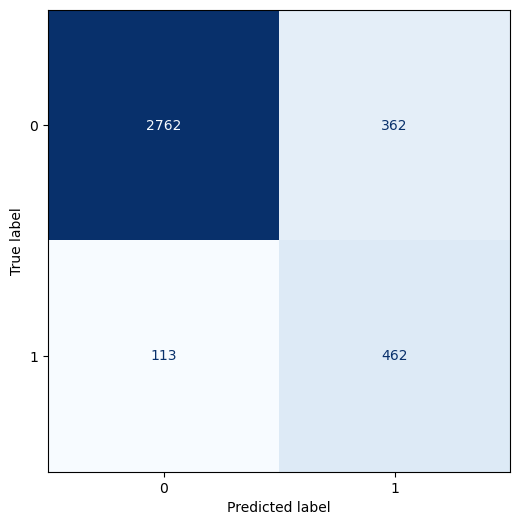

In [114]:
cm = confusion_matrix(y_test, y_pred_random_dt)

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_random_dt, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [115]:
random_search_best_params_dt = best_random_search_model_dt.best_params_
print('Best parameters found: ', random_search_best_params_dt)

Best parameters found:  {'min_samples_split': 1022, 'min_samples_leaf': 4898, 'min_impurity_decrease': 0.0009, 'max_leaf_nodes': 303, 'max_depth': 1, 'criterion': 'gini'}


#### Grid Search - Decision Tree

In [116]:
plus_minus = 5 
increment = 1

param_grid_dt = { 'min_samples_split': [x for x in range(random_search_best_params_dt['min_samples_split']-plus_minus, random_search_best_params_dt['min_samples_split']+plus_minus,2) if x >= 2],       
              'min_samples_leaf': [x for x in range(random_search_best_params_dt['min_samples_leaf']-plus_minus , random_search_best_params_dt['min_samples_leaf']+plus_minus,2) if x > 0],
              'min_impurity_decrease': [x for x in np.arange(random_search_best_params_dt['min_impurity_decrease']-0.001, random_search_best_params_dt['min_impurity_decrease']+0.001,.0001).round(5) if x >= 0.000],
              'max_leaf_nodes':[x for x in range(random_search_best_params_dt['max_leaf_nodes']-plus_minus , random_search_best_params_dt['max_leaf_nodes']+plus_minus, 2) if x > 1],  
              'max_depth': [x for x in range(random_search_best_params_dt['max_depth']-plus_minus , random_search_best_params_dt['max_depth']+plus_minus, 2) if x > 1],
              'criterion': [random_search_best_params_dt['criterion']]
              }



In [117]:
best_grid_search_model_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                                    scoring='f1', param_grid=param_grid_dt, cv=10, verbose=0,  n_jobs = -1)
_ = best_grid_search_model_dt.fit(X_smote, y_smote)

In [118]:
y_pred_grid_dt = best_grid_search_model_dt.predict(X_test)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_grid_dt)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_grid_dt)}")
print(f"{'Recall Score: ':18}{recall_score(y_test, y_pred_grid_dt)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_grid_dt)}")
print(f"{'Confusion matrix: ':18}{confusion_matrix(y_test, y_pred_grid_dt)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_grid_dt)}")
print("************************************")

************************************
Accuracy Score:   0.8715869153825359
Precision Score:  0.5606796116504854
Recall Score:     0.8034782608695652
F1 Score:         0.6604717655468192
Confusion matrix: [[2762  362]
 [ 113  462]]
Classification report:               precision    recall  f1-score   support

           0       0.96      0.88      0.92      3124
           1       0.56      0.80      0.66       575

    accuracy                           0.87      3699
   macro avg       0.76      0.84      0.79      3699
weighted avg       0.90      0.87      0.88      3699

************************************


The weighed average F1 Score for this model is 0.88.The value is same as of the Random Search model.

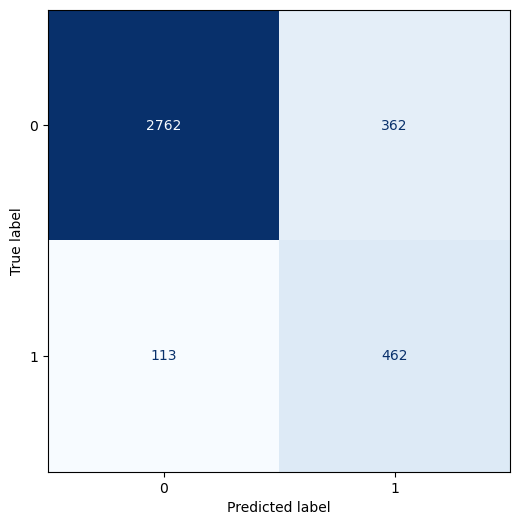

In [119]:
cm = confusion_matrix(y_test, y_pred_grid_dt)

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_grid_dt, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

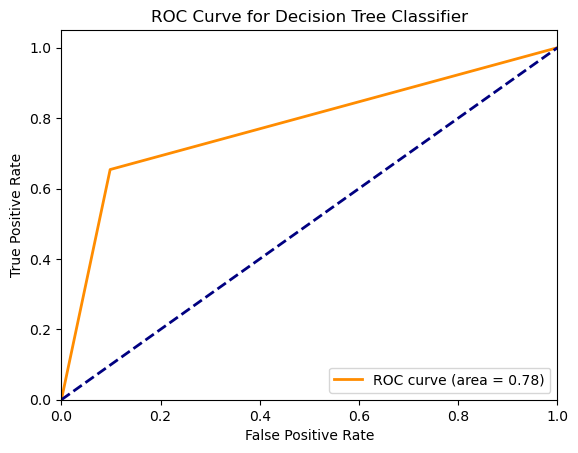

In [68]:
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

The area under the ROC curve is 0.78 for this model.

## Support Vector Classifier (SVC) Model Development

In this section, we will explore the development of a Support Vector Classifier (SVC) model using two different kernels: Linear and Radial Basis Function (RBF). The choice of kernel can significantly impact the model's performance, and we will evaluate the performance of both kernels.

We have chosen to work with the SVC model for its ability to handle both classification and regression tasks. It's a powerful model that can create complex decision boundaries.

#### Linear Kernel

The Linear kernel is suitable for problems where the data is linearly separable. It assumes that the data can be separated by a straight line. This kernel is useful for simpler, well-separated datasets.

#### Radial Basis Function (RBF) Kernel

The RBF kernel is more flexible and can handle non-linear data. It's often the preferred choice for complex datasets where the decision boundary is not linear. It uses a Gaussian radial basis function to map data into a higher-dimensional space.

## SVC - Linear Kernel

In [69]:
svc_model = SVC(kernel='linear')

svc_model.fit(X_smote, y_smote)
svc_predictions = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)
svc_report = classification_report(y_test, svc_predictions)

In [47]:
print("SVC Accuracy:", svc_accuracy)
print("SVC Precision:", svc_precision)
print("SVC recall:", svc_recall)
print("SVC f1:", svc_f1)
print("SVC classification report :", svc_report)

SVC Accuracy: 0.8780751554474182
SVC Precision: 0.5822281167108754
SVC recall: 0.7634782608695653
SVC f1: 0.6606471030850264
SVC classification report :               precision    recall  f1-score   support

           0       0.95      0.90      0.93      3124
           1       0.58      0.76      0.66       575

    accuracy                           0.88      3699
   macro avg       0.77      0.83      0.79      3699
weighted avg       0.90      0.88      0.88      3699



The weighed average F1 Score for this model is 0.88.

## SVC - Non Linear Kernel

In [48]:
svc_model = SVC(kernel='rbf')

svc_model.fit(X_smote, y_smote)
svc_predictions = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)
svc_report = classification_report(y_test, svc_predictions)

In [49]:
print("SVC Accuracy:", svc_accuracy)
print("SVC Precision:", svc_precision)
print("SVC recall:", svc_recall)
print("SVC f1:", svc_f1)
print("SVC classification report :", svc_report)

SVC Accuracy: 0.862124898621249
SVC Precision: 0.5412960609911055
SVC recall: 0.7408695652173913
SVC f1: 0.6255506607929516
SVC classification report :               precision    recall  f1-score   support

           0       0.95      0.88      0.92      3124
           1       0.54      0.74      0.63       575

    accuracy                           0.86      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.89      0.86      0.87      3699



The weighed average F1 Score for this model is 0.87.

### Hyper Parameter Tuning SVC Model

In this section, we will explore the process of hyperparameter tuning for our Support Vector Classifier (SVC) model. Hyperparameter tuning is essential for optimizing the performance of the model. We will focus on finding the best combination of hyperparameters to achieve better predictive accuracy.

The Support Vector Classifier model has various hyperparameters that can be adjusted to improve model performance. Some of the key hyperparameters we will tune include are mentioned below:

In [58]:
svc_model=SVC(random_state=42)
param_grid_svc = {
    'C': [0.1,1,10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))  # Kernel coefficient
}

#### Random Search - SVC

In [59]:
random_search_svc = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=param_grid_svc,
    #n_iter=50,  # Number of random combinations to try
    scoring='f1',  # Choosing the scoring metric
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,  # Using all available CPU cores
    verbose=2  # Verbosity level
)

random_search_svc.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1.0, 10.0, 100.0,
                                                  1000.0],
                                        'kernel': ['linear', 'rbf']},
                   scoring='f1', verbose=2)

In [52]:
y_pred_random_svc = random_search_svc.predict(X_test)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_random_svc)}")
print(f"{'Precison Score: ':18}{precision_score(y_test, y_pred_random_svc)}")
print(f"{'Recall Score: ':18}{recall_score(y_test, y_pred_random_svc)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_random_svc)}")
print(f"{'Confusion matrix: ':18}{confusion_matrix(y_test, y_pred_random_svc)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_random_svc)}")
print("************************************")

************************************
Accuracy Score:   0.8442822384428224
Precison Score:   0.4978540772532189
Recall Score:     0.20173913043478262
F1 Score:         0.28712871287128716
Confusion matrix: [[3007  117]
 [ 459  116]]
Classification report:               precision    recall  f1-score   support

           0       0.87      0.96      0.91      3124
           1       0.50      0.20      0.29       575

    accuracy                           0.84      3699
   macro avg       0.68      0.58      0.60      3699
weighted avg       0.81      0.84      0.82      3699

************************************


The weighed average F1 Score for this model is 0.82.

#### Grid Search - SVC

In [128]:
grid_search_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_svc,
    scoring='f1',  # Choose the scoring metric
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Verbosity level
)

In [129]:
grid_search_svc.fit(X_smote, y_smote)

y_pred_grid_svc= grid_search_svc.predict(X_test)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [130]:
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_grid_svc)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_grid_svc)}")
print(f"{'Recall Score: ':18}{recall_score(y_test, y_pred_grid_svc)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_grid_svc)}")
print(f"{'Confusion matrix: ':18}{confusion_matrix(y_test, y_pred_grid_svc)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_grid_svc)}")
print("************************************")

************************************
Accuracy Score:   0.8437415517707488
Precision Score:  0.4936708860759494
Recall Score:     0.20347826086956522
F1 Score:         0.2881773399014778
Confusion matrix: [[3004  120]
 [ 458  117]]
Classification report:               precision    recall  f1-score   support

           0       0.87      0.96      0.91      3124
           1       0.49      0.20      0.29       575

    accuracy                           0.84      3699
   macro avg       0.68      0.58      0.60      3699
weighted avg       0.81      0.84      0.82      3699

************************************


The weighed average F1 Score for this model is 0.82.

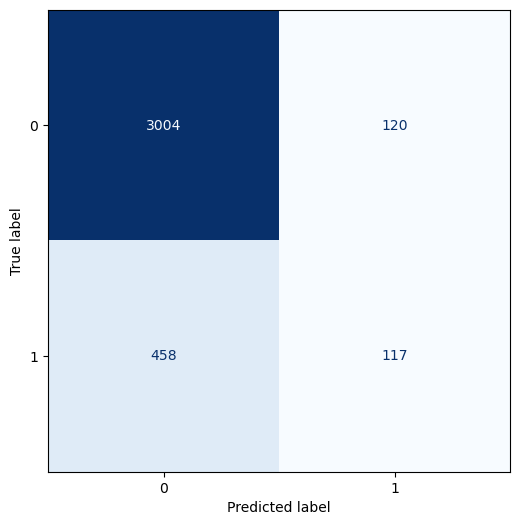

In [131]:
cm = confusion_matrix(y_test, y_pred_grid_svc)

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_grid_svc, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

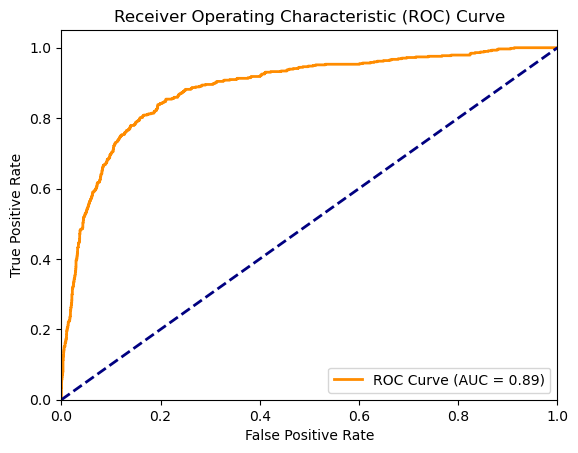

In [135]:
svc_model=SVC(probability=True)
svc_model.fit(X_smote, y_smote)
y_prob = svc_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area under the curve for this curve is 0.89

## Random Forest

In this section, we will explore the development of a Random Forest model. Random Forest is an ensemble learning technique that combines multiple decision trees to create a powerful and robust predictive model.

We have chosen to work with the Random Forest model due to its ability to handle both classification and regression tasks effectively. It's an ensemble of decision trees, which reduces the risk of overfitting and improves model generalization.

In [70]:
rforest = RandomForestClassifier()

In [72]:
_ = rforest.fit(X_smote, y_smote)

In [73]:
y_pred_RF = rforest.predict(X_test)

In [74]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_RF)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_RF)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_RF)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_RF)}")
print(f"{'Confusion matrix: ':18}{confusion_matrix(y_test, y_pred_RF)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_RF)}")

      Model             Score       
************************************
Accuracy Score:   0.8948364422816978
Precision Score:  0.6422018348623854
Recall Score:     0.7304347826086957
F1 Score:         0.6834825061025225
Confusion matrix: [[2890  234]
 [ 155  420]]
Classification report:               precision    recall  f1-score   support

           0       0.95      0.93      0.94      3124
           1       0.64      0.73      0.68       575

    accuracy                           0.89      3699
   macro avg       0.80      0.83      0.81      3699
weighted avg       0.90      0.89      0.90      3699



The weighed average F1 Score for this model is 0.9.

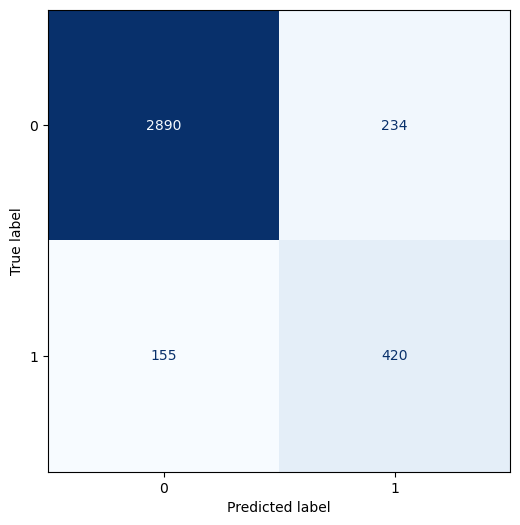

In [75]:
cm = confusion_matrix(y_test, y_pred_RF)

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_RF, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

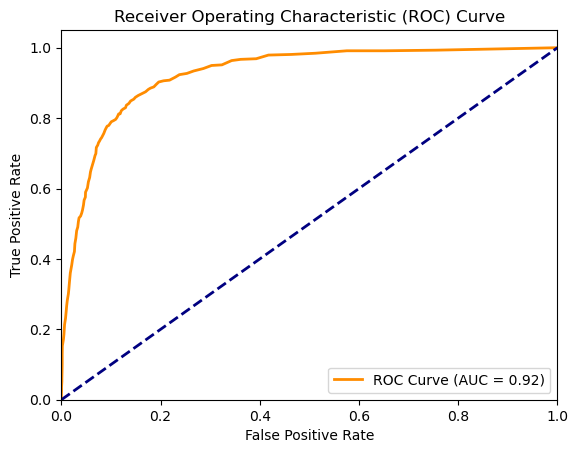

In [120]:
y_prob = rforest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area under this cureve is 0.92

## AdaBoost Technique

In this section, we will explore the development of an AdaBoost model. AdaBoost, short for Adaptive Boosting, is an ensemble learning technique that combines multiple weak learners to create a strong and adaptive predictive model.

We have chosen to work with the AdaBoost model due to its ensemble approach, which focuses on improving the classification performance of weak learners. AdaBoost is suitable for a variety of classification tasks and is known for its adaptability.

In [77]:
aboost = AdaBoostClassifier()

In [78]:
_ = aboost.fit(X_smote, y_smote)

In [79]:
y_pred_aboost = aboost.predict(X_test)

In [80]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_aboost)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_aboost)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_aboost)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_aboost)}")
print(f"{'Confusion matrix: ':18}{confusion_matrix(y_test, y_pred_aboost)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_aboost)}")

      Model             Score       
************************************
Accuracy Score:   0.8796972154636388
Precision Score:  0.5918079096045198
Recall Score:     0.7286956521739131
F1 Score:         0.6531566640685893
Confusion matrix: [[2835  289]
 [ 156  419]]
Classification report:               precision    recall  f1-score   support

           0       0.95      0.91      0.93      3124
           1       0.59      0.73      0.65       575

    accuracy                           0.88      3699
   macro avg       0.77      0.82      0.79      3699
weighted avg       0.89      0.88      0.88      3699



The weighed average F1 Score for this model is 0.88.

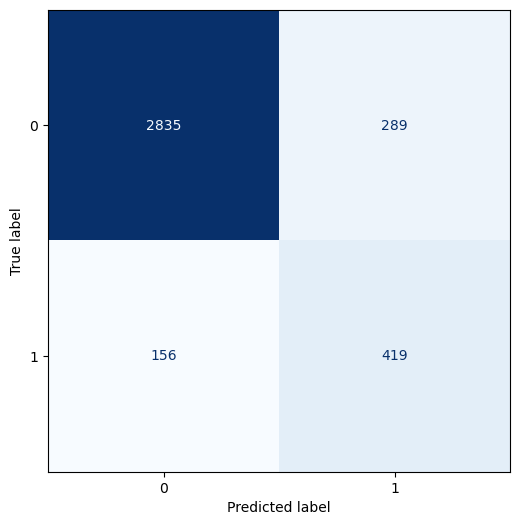

In [81]:
cm = confusion_matrix(y_test, y_pred_aboost)

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_aboost, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

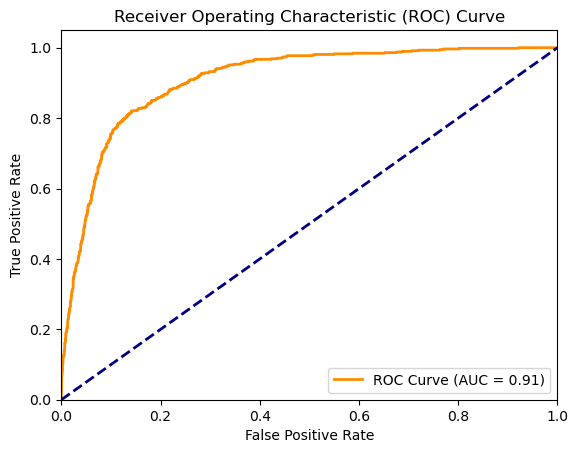

In [121]:
y_prob = aboost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area under this curve is 0.91.

## Gradient Boosting

In this section, we will explore the development of a Gradient Boosting model. Gradient Boosting is a powerful ensemble learning technique that builds an additive model in a stage-wise manner. It's known for its ability to handle complex datasets and deliver high predictive accuracy.

We have chosen to work with the Gradient Boosting model due to its effectiveness in improving predictive accuracy by sequentially adding weak learners to the model. It's particularly suitable for tasks where high precision and generalization are required.

In [83]:
gboost = GradientBoostingClassifier()

In [84]:
_ = gboost.fit(X_smote, y_smote)

In [85]:
y_pred_gboost = gboost.predict(X_test)

In [86]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_gboost)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_gboost)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_gboost)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_gboost)}")
print(f"{'Confusion matrix: ':18}{confusion_matrix(y_test, y_pred_gboost)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_gboost)}")

      Model             Score       
************************************
Accuracy Score:   0.8926736955934036
Precision Score:  0.6328358208955224
Recall Score:     0.7373913043478261
F1 Score:         0.6811244979919678
Confusion matrix: [[2878  246]
 [ 151  424]]
Classification report:               precision    recall  f1-score   support

           0       0.95      0.92      0.94      3124
           1       0.63      0.74      0.68       575

    accuracy                           0.89      3699
   macro avg       0.79      0.83      0.81      3699
weighted avg       0.90      0.89      0.90      3699



The weighed average F1 Score for this model is 0.9.

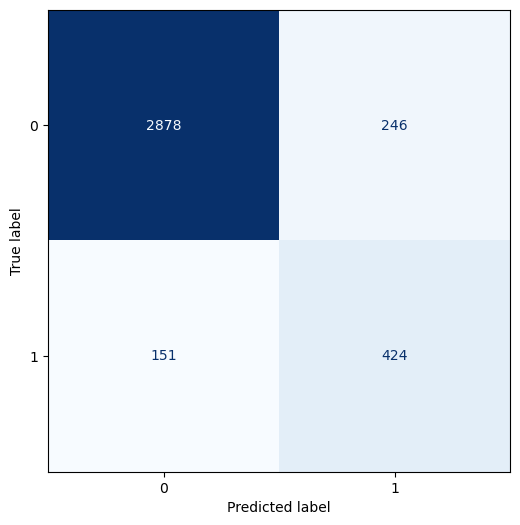

In [87]:
cm = confusion_matrix(y_test, y_pred_gboost)

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_gboost, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

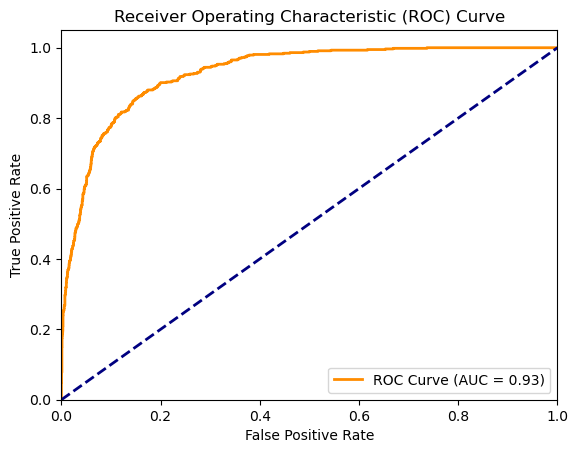

In [122]:
y_prob = gboost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## XGBoost

In this section, we will explore the development of an XGBoost model. XGBoost, short for Extreme Gradient Boosting, is a powerful and efficient ensemble learning technique that has gained popularity for its excellent performance in various machine learning tasks.

We have chosen to work with the XGBoost model due to its exceptional predictive accuracy and efficiency. XGBoost is known for its ability to handle complex datasets, feature selection, and regularization, making it a top choice for many data science projects.


In [89]:
xgboost = XGBClassifier()

In [90]:
_ = xgboost.fit(X_smote, y_smote)

In [91]:
y_pred_xboost = xgboost.predict(X_test)

In [92]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_xboost)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_xboost)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_xboost)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_xboost)}")
print(f"{'Confusion matrix: ':18}{confusion_matrix(y_test, y_pred_xboost)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_pred_xboost)}")

      Model             Score       
************************************
Accuracy Score:   0.8921330089213301
Precision Score:  0.6517241379310345
Recall Score:     0.6573913043478261
F1 Score:         0.6545454545454545
Confusion matrix: [[2922  202]
 [ 197  378]]
Classification report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94      3124
           1       0.65      0.66      0.65       575

    accuracy                           0.89      3699
   macro avg       0.79      0.80      0.80      3699
weighted avg       0.89      0.89      0.89      3699



The weighed average F1 Score for this model is 0.89.

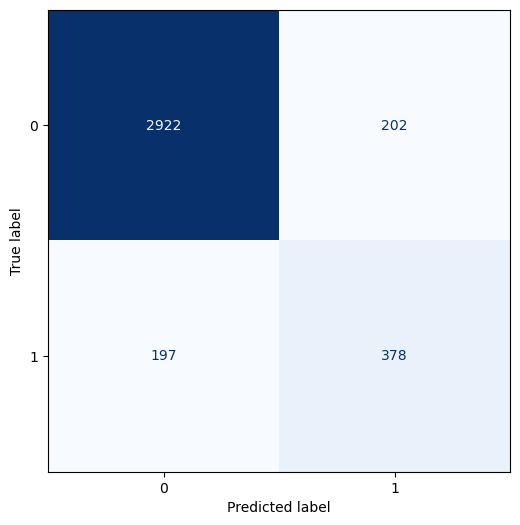

In [93]:
cm = confusion_matrix(y_test, y_pred_xboost)

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_xboost, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

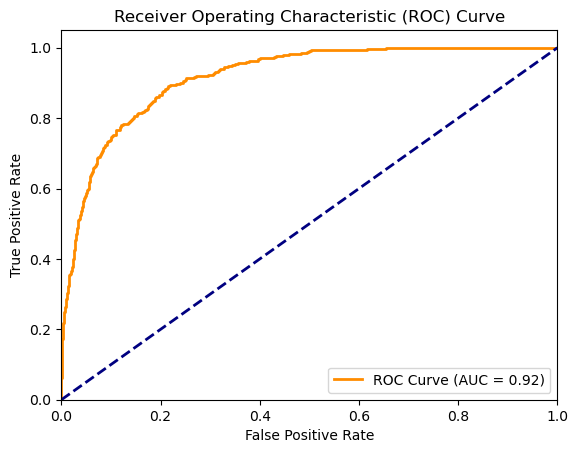

In [123]:
y_prob = xgboost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area under this curve is 0.92.

## Neural Networks

In this section, we will explore the development of a Neural Network model. Neural Networks, often referred to as deep learning models, have gained significant popularity for their ability to handle complex tasks and learn intricate patterns from data.

We have chosen to work with a Neural Network model due to its capacity to capture complex relationships within data and solve a wide range of machine learning problems, including image classification, natural language processing, and more.

In [125]:
ann = MLPClassifier(hidden_layer_sizes=(500,200,100,10), max_iter=1000)
ann.fit(X_smote, y_smote)
y_test_pred_ann = ann.predict(X_test)

Here we used Artificial Neural Network (ANN) using the MLPClassifier from the scikit-learn library.

In this case, the neural network has four hidden layers with 500 neurons in the first layer, 200 neurons in the second layer, 100 neurons in the third layer, and 10 neurons in the fourth layer. These are the layers that process and learn from the data.

In [126]:
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test,y_test_pred_ann )}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_test_pred_ann)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_test_pred_ann)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_test_pred_ann)}")
print(f"{'Confusion matrix: ':18}{confusion_matrix(y_test, y_test_pred_ann)}")
print(f"{'Classification report: ':18}{classification_report(y_test, y_test_pred_ann)}")

Accuracy Score:   0.8678021086780211
Precision Score:  0.5711920529801324
Recall Score:     0.6
F1 Score:         0.5852417302798982
Confusion matrix: [[2865  259]
 [ 230  345]]
Classification report:               precision    recall  f1-score   support

           0       0.93      0.92      0.92      3124
           1       0.57      0.60      0.59       575

    accuracy                           0.87      3699
   macro avg       0.75      0.76      0.75      3699
weighted avg       0.87      0.87      0.87      3699



Area under this curve is 0.87.

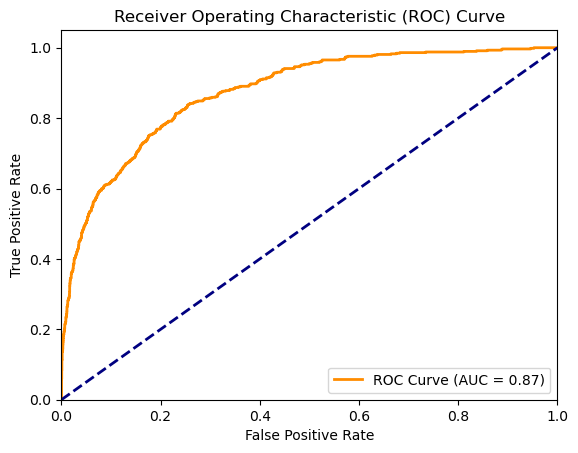

In [127]:
y_prob = ann.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Results and Discussion Summary

### Before Hyper parameter tuning :

| Description  of Model    | Accuracy | Recall   | Precision | f1-score |ROC-AUC|
|--------------------------|----------|----------|-----------|----------|-------|
| Logistic                 | 0.85     | 0.85     | 0.88      | 0.86     |0.9    |
| KNN                      | 0.73     | 0.73     | 0.86      | 0.77     | -     |
| SVM_MODEL(Linear kernel) | 0.88     | 0.88     | 0.90      | 0.88     | -     |
| SVM_MODEL(Rbf kernel)    | 0.86     | 0.86     | 0.89      | 0.87     |0.8    |
| Decision Tree            | 0.86     | 0.86     | 0.87      | 0.87     |0.78   |
| Random Forest            | 0.89     | 0.89     | 0.90      | 0.90     |0.92   |
| Ada Boost                | 0.88     | 0.88     | 0.89      | 0.88     |0.91   |
| Gradient Boost           | 0.89     | 0.89     | 0.90      | 0.90     |0.93   |
| XG Boost                 | 0.89     | 0.89     | 0.89      | 0.89     |0.92   |
| Neural Network           | 0.87     | 0.87     | 0.87      | 0.87     |0.87   |

In our Online Shoppers Purchase Intention Model, maximizing the F1 Score is crucial to avoid losing potential revenue.Its essential to balance both False Positives and False Negatives.As False positives may lead to annoying or spamming customers, which may cause dissatisfaction and even loss of potential sales if the user decides to disengage from the platform. It can also incur additional marketing costs and resource wastage.False negatives can result in missed opportunities.The user may not receive relevant product recommendations or incentives, potentially causing them to abandon their shopping session. Over time, this can impact the business's profitability and customer satisfaction.

Since we are focused on maximizing our F1 score value from the initial stage of the problem,we can observe from the above values that Gradient Boost model is giving us higher F1 score value than the other models.we are gonna consider it as our best model before hyperparameter tuning since we are mainly focused on maximizing our F1 Score.

### After Hyper parameter tuning : 


| Description               | Accuracy | Recall   | Precision | f1-score |
|---------------------------|----------|----------|-----------|----------|
| Logistic (Random Search)  | 0.86     | 0.86     | 0.89      | 0.87     |
| Logistic (Grid Search)    | 0.88     | 0.88     | 0.90      | 0.89     |
| SVM(Rbf)(RandomSearch)    | 0.84     | 0.84     | 0.81      | 0.82     |
| SVM(Rbf)(GridSearch)      | 0.84     | 0.84     | 0.81      | 0.82     |
| DecisionTree(RandomSearch)| 0.87     | 0.87     | 0.90      | 0.88     |
| DecisionTree(GridSearch)  | 0.87     | 0.87     | 0.90      | 0.88     |


We can observe that Gradient Boost Model is giving us higher F1 Score value than other models.Even thouhgh Random forest model also has same F1 Score value=0.9, Area under curve (AUC) is little bit more for Gradient Boost model.So we can choose the best prediction model as Gradient Boost in this problem context.We will deploy Gradient Boost model for production.

We chose our business objective to maintain both False Negatives and False positives we took F1 scrore as our main metric measure.However this might not be the case in every business, Based on the different Business Objectives and requirements one can choose to maximize Recall maintaining a threshold cap on Precison or Vice versa.

#### Future Scope

The scope of this project is only limited to predicting customer purchase intention and evaluating and measuring the F1score of these predictions.As for the Future scope,accurately predicting customer purchase intentions can significantly enhance the development of diverse marketing strategies and potentially integrate with an E-COMMERCE WEBSITE PRODUCT RECOMMENDATION SYSTEM. 

For example, if the machine learning solution indicates a high likelihood of a customer's purchase intent, the recommendation system might suggest premium or more expensive products, as it can be inferred that the user is inclined to consider higher-quality or pricier items when their intent to purchase is strong. On the other hand, if the solution predicts a lower purchase intent, the recommendation system could propose discounted products or items with special offers, such as 'Buy one, get one free.'Furthermore, the historical data on how customer intentions change in response to these recommendations can also be studied and applied to enhance the recommendation system's effectiveness.

#### Conclusion

This remarkable F1 score demonstrates the model's effectiveness in predicting whether a visitor is likely to make a purchase during their online session. It signifies the potential for businesses to significantly enhance their sales conversion rates by leveraging such predictive models to provide real-time assistance and incentives to potential customers.

In conclusion, our project aimed to address the pressing issue of low sales conversion in online shopping.We developed a predictive model with gboost that proved to be highly successful, achieving a weighted average F1 score of 0.9. By understanding and predicting customer purchase intentions, businesses can proactively engage with potential customers and optimize their online shopping experience, ultimately increasing revenue and profitability. This solution enables companies to remain competitive and thrive in the ever-growing e-commerce sector.